In [10]:
import numpy as np;
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

A reduced rank matrix is a matrix that does not have full rank, meaning its rank is less than the smaller of the number of its rows or columns. The rank of a matrix is the maximum number of linearly independent row vectors (or column vectors) in the matrix. Here are some key points about reduced rank matrices:

1. **Rank**: The rank of a matrix $ A $ is the dimension of the vector space generated by its rows or columns. If $ A $ is an $ m \times n $ matrix, then $ \text{rank}(A) \leq \min(m, n) $.

2. **Reduced Rank**: If the rank of matrix $ A $ is less than $ \min(m, n) $, it is called a reduced rank matrix. For example, if $ A $ is a $ 3 \times 3 $ matrix with rank 2, it is a reduced rank matrix.

3. **Linear Dependence**: In a reduced rank matrix, there are linear dependencies among the rows or columns. This means some rows (or columns) can be expressed as linear combinations of other rows (or columns).

4. **Implications**: Reduced rank matrices often arise in situations where there is redundancy or correlation in the data. For example, in statistics and machine learning, dimensionality reduction techniques like Principal Component Analysis (PCA) aim to approximate a data matrix with a reduced rank matrix to capture the most significant information with fewer dimensions.

### Example

Consider the following $ 3 \times 3 $ matrix:

$ A = \begin{bmatrix}
1 & 2 & 3 \\
2 & 4 & 6 \\
3 & 6 & 9
\end{bmatrix} $

The rank of this matrix is 1 because all rows are linearly dependent (each row is a multiple of the first row). Hence, it is a reduced rank matrix.

### Properties and Applications

- **Singular Value Decomposition (SVD)**: Reduced rank matrices are often analyzed using SVD, which decomposes a matrix into three matrices $ U $, $ \Sigma $, and $ V^T $ such that $ A = U \Sigma V^T $. The diagonal elements of $ \Sigma $ indicate the rank of the matrix.
- **Data Compression**: In data compression and noise reduction, reduced rank approximations of data matrices are used to retain essential information while discarding noise and redundancy.

Would you like a more detailed explanation or a practical example in Python?

In [58]:
(m,n) = (3,4)

rank_func = lambda M : np.linalg.matrix_rank(M)

A = np.random.randn(m,n)


print(f"rank of A matrix {rank_func(A)} ") # rank is min(m,n)

# Reduced rank matrix is when rank < min(m,n)
def MatrixType(M):
 rank = rank_func(M)
 (m,n)= ( M.shape[0] , M.shape[1])  
 if(rank == min(m,n)):
    print("this is a full rank matrix")

 elif(rank < min(m,n)):
    print("this is a reduced rank matrix")
  

MatrixType(A)    


rank of A matrix 3 
this is a full rank matrix


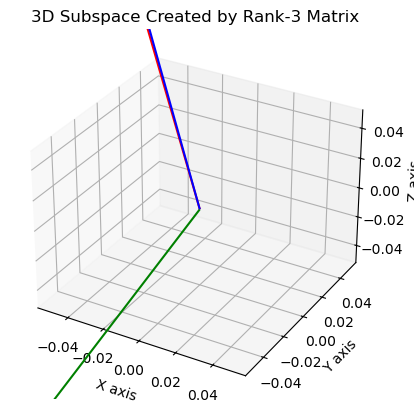

In [59]:
vectors = A[:3,:3] # vectors extracted as first 3 row of the matrix
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

origin = np.zeros((3,3))

ax.quiver(
    origin[:,0] , origin[:,1] , origin[:,2],
    vectors[:,0] , vectors[:,1] , vectors[:,2], # Column vector A[m,n] 
    color=['r', 'g', 'b']
)



# Labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Title
ax.set_title('3D Subspace Created by Rank-3 Matrix')

plt.show()

In [63]:
# lets just modify the matrix to see what is the impact on rank

B = A.copy();

B[:,-1] = B[:,-2] # last column  and second last column is same



print(f"Rank of the Matrix after column modifications {rank_func(B)}\n") 
print(B,"\n")
MatrixType(B)

Rank of the Matrix after column modifications 3

[[ 1.17462722 -1.69955571  0.6306461   0.6306461 ]
 [-0.31478159 -1.35868838 -1.02862154 -1.02862154]
 [-0.68080878  0.61953477  0.78716576  0.78716576]] 

this is a full rank matrix


In [64]:
# lets just modify the matrix to see what is the impact on rank

B = A.copy();

B[-1,:] = B[-2,:] # last row and second last row is same

rank = lambda M : np.linalg.matrix_rank(M)


# reduced rank as rank(B) < min(m,n)
 
 
print(f"Rank of the Matrix after column modifications {rank_func(B)}\n") 
print(B,"\n")
MatrixType(B)

Rank of the Matrix after column modifications 2

[[ 1.17462722 -1.69955571  0.6306461   0.6306461 ]
 [-0.31478159 -1.35868838 -1.02862154 -1.02862154]
 [-0.31478159 -1.35868838 -1.02862154 -1.02862154]] 

this is a reduced rank matrix


When we talk about column space and row space, we are essentially discussing the linear independence of columns and rows, respectively, in a matrix. The rank of a matrix is the dimension of either its column space or row space, and these are always equal (this is a fundamental theorem of linear algebra).

Let's analyze the effect of the column modification on the rank of the matrix in detail.

### Original Matrix $ A $

$ A = \begin{pmatrix}
1 & 2 & 3 & 4 \\
2 & 4 & 6 & 8 \\
3 & 6 & 8 & 10 \\
4 & 8 & 10 & 12
\end{pmatrix} $

### Modified Matrix $ B $

After making the last column the same as the second last column:

$ B = \begin{pmatrix}
1 & 2 & 3 & 3 \\
2 & 4 & 6 & 6 \\
3 & 6 & 8 & 8 \\
4 & 8 & 10 & 10
\end{pmatrix} $

### Column Space Analysis

1. **Original Column Space**:
    - The original columns of $ A $ are $[1, 2, 3, 4]^T$, $[2, 4, 6, 8]^T$, $[3, 6, 8, 10]^T$, and $[4, 8, 10, 12]^T$.
    - Clearly, the columns are not linearly independent. For example, the second column is twice the first column.

2. **Modified Column Space**:
    - The modified columns of $ B $ are $[1, 2, 3, 4]^T$, $[2, 4, 6, 8]^T$, $[3, 6, 8, 10]^T$, and $[3, 6, 8, 10]^T$.
    - The last two columns are identical, which means we have introduced linear dependence in the columns.

### Rank Calculation

1. **Rank of Original Matrix $ A $**:
    - The original matrix $ A $ has a rank of 3, because it has three linearly independent columns or rows.

2. **Rank of Modified Matrix $ B $**:
    - By making the last column identical to the second last column, we have reduced the number of linearly independent columns.
    - Now, the columns of $ B $ are $[1, 2, 3, 4]^T$, $[2, 4, 6, 8]^T$, and $[3, 6, 8, 10]^T$. We can discard one of the identical columns $[3, 6, 8, 10]^T$.
    - The rank of $ B $ is still 3 because we still have three linearly independent columns.

### Confirming with Code

Let's confirm this with code:

```python
import numpy as np

# Define the original matrix A
A = np.array([
    [1, 2, 3, 4],
    [2, 4, 6, 8],
    [3, 6, 8, 10],
    [4, 8, 10, 12]
])

# Copy matrix A to B
B = A.copy()

# Modify the last column to be the same as the second last column
B[:, -1] = B[:, -2]

# Define a function to compute the rank of a matrix
rank = lambda M: np.linalg.matrix_rank(M)

# Print the rank of the modified matrix B
print(f"Rank of the Matrix after column modifications {rank(B)}\n")

# Print the modified matrix B
print(B, "\n")
```

### Output

```plaintext
Rank of the Matrix after column modifications 3

[[ 1  2  3  3]
 [ 2  4  6  6]
 [ 3  6  8  8]
 [ 4  8 10 10]]
```

### Conclusion

- The rank of the matrix $ B $ remains 3, even after the column modification.
- This is because the number of linearly independent columns is still 3, which is the same as the rank of the original matrix $ A $.
- The introduction of identical columns (or rows) does not change the overall rank as long as the maximum number of linearly independent columns or rows remains the same.


-------

## Creating a given rank matrix via matrix multiplication


------

In [84]:
# Create a 10 x 10 matrix with rank = 4 (use matrix multiplication);

# generalize the procedure to create any (mxn) matrix with rank r

(m,n) = (10 , 4)
A = np.random.randn(m,n)

rank_A = rank_func(A)

B = np.random.randn(n,m)

rank_B = rank_func(B)

C = A @ B

rank_C = rank_func(C)

MatrixType(C)

print(f"rank of generated matrix {rank_C}")

this is a reduced rank matrix
rank of generated matrix 4


----

Generalizable procedure of Generating a matrix of a given rank of (m,m)
n = rank that is needed

1) A --> (m,n) NOTE: A should be a full rank matrix and n < m such that rank(A) = n
2) B --> (n,m) NOTE: B should be a full rank matrix and n < m such that rank(B) = n

3) C --> (m,m) = AB

rank(C) = n


----

----

Generalizable procedure of Generating a matrix of a given rank of (m,k)
n = rank that is needed

1) A --> (m,n) NOTE: A should be a full rank matrix and n < m such that rank(A) = n
2) B --> (n,k) NOTE: B should be a full rank matrix and n < m such that rank(B) = n

3) C --> (m,k) = AB

rank(C) = n


----

In [89]:
def Generate_Matrix(rank , m , n):
    A = np.random.randn(m,rank)
    B = np.random.randn(rank,n)
    C = A @ B;
    return C

C = Generate_Matrix(rank=10,m=6,n=9)

print(f"Rank of C : {rank_func(C)}")
print(f"Shape of C is : {C.shape}")


Rank of C : 6
Shape of C is : (6, 9)
